# THE SPARK FOUNDATION - GRIP

# TASK 1- PREDICTION USING SUPERVISED MACHINE LEARNING

## TASK 1 DESCRIPTION - PREDICT THE PERCENTAGE OF A STUDENT BASED ON THE NUMBER OF STUDY HOURS

# BY - DEVESH GANDHE

In [23]:
#import the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [24]:
#read the data from the given url
data_url = 'http://bit.ly/w-data'
s_data = pd.read_csv(data_url)
print('Data imported successfully')

Data imported successfully


In [25]:
#read first five values from the student data
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [26]:
#check the shape of student data
s_data.shape

(25, 2)

In [27]:
#checking data types 
s_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [28]:
#getting information from student data
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [29]:
#calculating statistical data
s_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [30]:
#checking if there are any null values in s_data
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# DATA VISUALIZATION

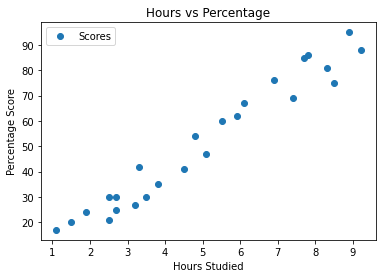

In [31]:
#plot the data points on 2-D graph
s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# From the above graph we can see tha there is a positive relation between hours and scores

# PREPARING THE DATA

In [10]:
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

In [11]:
#split the data and test sets with scikit-learn's 
#train_test_split() is a built in method 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
#applying linear regression model to data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Training complete')

Training complete


In [13]:
#making predictions
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [14]:
#calculating the intercept
print(regressor.intercept_)

2.018160041434683


In [15]:
#calculating the co-efficient 
print(regressor.coef_)

[9.91065648]


In [16]:
#calculating the straight line equation 
y_new = regressor.intercept_ + X*regressor.coef_

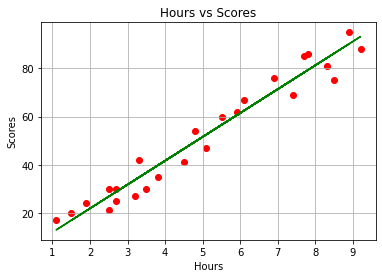

In [17]:
#plotting the best-fit line for given equation
plt.scatter(X,y,color='r')
plt.plot(X, y_new, color='g')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.grid()
plt.show()

In [18]:
#comparing the actual and predicted values
data = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
#training score
regressor.score(X_train, y_train)

0.9515510725211552

In [20]:
#test score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9454906892105356

In [21]:
#evaluating the model using mean absolute error
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  4.183859899002975


In [22]:
#calculating the predicted score if a student studies for 9.25 hours/day
hours = [[9.25]]
pred_value = regressor.predict(hours)
print('Number of hours = {}'.format(hours))
print('Predicted Score = {}'.format(pred_value[0]))

Number of hours = [[9.25]]
Predicted Score = 93.69173248737538
